In [1]:
import pandas as pd
import numpy as np
from pathlib import Path

# Paramètre de chemin vers le fichier 
DATA_PATH = Path("finance_economics_dataset.csv")

# Vérification d’existence pour éviter les erreurs silencieuses
if not DATA_PATH.exists():
    raise FileNotFoundError(f"Le fichier '{DATA_PATH}' est introuvable dans le dossier courant.")

# Chargement du CSV en DataFrame
# - low_memory=False: meilleure détection des types sur grands fichiers
df = pd.read_csv(DATA_PATH, low_memory=False)

# Aperçu minimal pour confirmer que tout est OK
print("Dataset chargé")
print("Shape :", df.shape)
print("Colonnes :", list(df.columns)[:10], ("..." if df.shape[1] > 10 else ""))

# Un coup d’œil sur le début/fin 
display(df.head(5))
display(df.tail(5))


Dataset chargé
Shape : (3000, 24)
Colonnes : ['Date', 'Stock Index', 'Open Price', 'Close Price', 'Daily High', 'Daily Low', 'Trading Volume', 'GDP Growth (%)', 'Inflation Rate (%)', 'Unemployment Rate (%)'] ...


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


,Date,Stock Index,Open Price,Close Price,Daily High,Daily Low,Trading Volume,GDP Growth (%),Inflation Rate (%),Unemployment Rate (%),...,Forex USD/EUR,Forex USD/JPY,Crude Oil Price (USD per Barrel),Gold Price (USD per Ounce),Real Estate Index,Retail Sales (Billion USD),Bankruptcy Rate (%),Mergers & Acquisitions Deals,Venture Capital Funding (Billion USD),Consumer Spending (Billion USD)
2995,2008-03-14,Dow Jones,1273.76,1235.44,1317.28,1192.34,86910001,8.84,7.00,10.44,...,1.18,113.52,61.98,2385.41,298.72,3033,8.75,35,66.01,2200
2996,2008-03-15,S&P 500,4589.59,4566.91,4607.56,4545.69,303579301,-1.88,9.15,5.61,...,1.17,147.10,31.61,2147.13,143.43,7950,5.07,18,25.49,5261
2997,2008-03-16,S&P 500,1477.52,1448.47,1523.86,1402.69,442387176,4.07,0.88,8.91,...,1.02,81.99,45.64,1943.61,105.81,3894,5.78,4,14.29,12039
2998,2008-03-17,NASDAQ,2311.37,2306.90,2346.30,2282.00,523425925,1.06,8.61,10.15,...,1.49,86.42,123.25,2211.40,236.07,2543,2.35,22,94.34,11979
2999,2008-03-18,NASDAQ,4262.98,4303.82,4316.68,4243.04,990814609,6.61,7.93,10.32,...,0.85,97.03,144.06,1225.09,201.82,4354,7.99,43,63.36,11220


In [2]:
# Aperçu général : info sur le type de données et les valeurs non nulles
print("=== Informations générales sur le dataset ===")
df.info()

# Vérification des valeurs manquantes
missing_values = df.isnull().sum().sort_values(ascending=False)
missing_percent = (df.isnull().mean() * 100).sort_values(ascending=False)
missing_df = pd.DataFrame({
    'missing_count': missing_values,
    'missing_percent': missing_percent
})
print("\n=== Valeurs manquantes (top 20) ===")
display(missing_df.head(20))

# Vérification des doublons
duplicate_count = df.duplicated().sum()
print(f"\n=== Doublons détectés : {duplicate_count} lignes ===")

# Aperçu statistique des colonnes numériques
print("\n=== Statistiques descriptives (colonnes numériques) ===")
display(df.describe().T)

# Aperçu des colonnes textuelles (facultatif mais utile pour comprendre les labels)
object_cols = df.select_dtypes(include='object').columns.tolist()
print(f"\n=== Colonnes de type texte ({len(object_cols)}) ===")
print(object_cols[:10], "..." if len(object_cols) > 10 else "")

# Vérif rapide de la présence de dates
date_like_cols = [col for col in df.columns if 'date' in col.lower()]
print("\n=== Colonnes contenant 'date' ===")
print(date_like_cols)


=== Informations générales sur le dataset ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Date                                   3000 non-null   object 
 1   Stock Index                            3000 non-null   object 
 2   Open Price                             3000 non-null   float64
 3   Close Price                            3000 non-null   float64
 4   Daily High                             3000 non-null   float64
 5   Daily Low                              3000 non-null   float64
 6   Trading Volume                         3000 non-null   int64  
 7   GDP Growth (%)                         3000 non-null   float64
 8   Inflation Rate (%)                     3000 non-null   float64
 9   Unemployment Rate (%)                  3000 non-null   float64
 10  Interest Rate (%)         

,missing_count,missing_percent
Date,0,0.0
Stock Index,0,0.0
Open Price,0,0.0
Close Price,0,0.0
Daily High,0,0.0
Daily Low,0,0.0
Trading Volume,0,0.0
GDP Growth (%),0,0.0
Inflation Rate (%),0,0.0
Unemployment Rate (%),0,0.0



=== Doublons détectés : 0 lignes ===

=== Statistiques descriptives (colonnes numériques) ===


,count,mean,std,min,25%,50%,75%,max
Open Price,3000.0,2.982095e+03,1.151863e+03,1000.05,1.994983e+03,2.970780e+03,3.974690e+03,4.998230e+03
Close Price,3000.0,2.981249e+03,1.151784e+03,954.52,1.997425e+03,2.977180e+03,3.982082e+03,5.034130e+03
Daily High,3000.0,3.018888e+03,1.151683e+03,1012.13,2.035952e+03,3.006520e+03,4.015217e+03,5.076190e+03
Daily Low,3000.0,2.944330e+03,1.151835e+03,917.17,1.955398e+03,2.939245e+03,3.934088e+03,4.977060e+03
Trading Volume,3000.0,5.033864e+08,2.859004e+08,1636024.00,2.545224e+08,5.033710e+08,7.537963e+08,9.999771e+08
GDP Growth (%),3000.0,2.608903e+00,4.287337e+00,-5.00,-1.012500e+00,2.725000e+00,6.242500e+00,1.000000e+01
Inflation Rate (%),3000.0,5.096830e+00,2.910513e+00,0.01,2.607500e+00,5.110000e+00,7.600000e+00,1.000000e+01
Unemployment Rate (%),3000.0,8.663787e+00,3.737536e+00,2.00,5.450000e+00,8.710000e+00,1.188250e+01,1.500000e+01
Interest Rate (%),3000.0,5.218237e+00,2.726115e+00,0.50,2.890000e+00,5.250000e+00,7.492500e+00,1.000000e+01
Consumer Confidence Index,3000.0,8.503600e+01,2.022483e+01,50.00,6.800000e+01,8.600000e+01,1.030000e+02,1.190000e+02



=== Colonnes de type texte (2) ===
['Date', 'Stock Index'] 

=== Colonnes contenant 'date' ===
['Date']


In [3]:
# Copie de sécurité (toujours bonne pratique)
df_clean = df.copy()

# Fonction pour nettoyer les noms de colonnes
def clean_column_name(col_name: str) -> str:
    """
    Nettoie les noms de colonnes :
    - met en minuscules
    - supprime les caractères spéciaux (, ), %, /, -
    - remplace les espaces par des underscores
    - supprime les doubles underscores
    """
    cleaned = col_name.lower()
    cleaned = (
        cleaned.replace("(", "")
        .replace(")", "")
        .replace("%", " pct")
        .replace("/", " ")
        .replace("-", " ")
        .replace(".", " ")
    )
    cleaned = "_".join(cleaned.split())  # remplace les espaces multiples par un seul "_"
    cleaned = cleaned.replace("__", "_") # au cas où
    return cleaned

# Application à toutes les colonnes
old_names = df_clean.columns.tolist()
df_clean.columns = [clean_column_name(c) for c in df_clean.columns]

# Vérification du renommage
renaming_preview = pd.DataFrame({
    "Ancien nom": old_names,
    "Nouveau nom": df_clean.columns
})
print("✅ Renommage des colonnes effectué :")
display(renaming_preview)

# Vérification rapide du résultat
print("Shape :", df_clean.shape)
print("Aperçu des 5 premières lignes :")
display(df_clean.head())


✅ Renommage des colonnes effectué :


,Ancien nom,Nouveau nom
0,Date,date
1,Stock Index,stock_index
2,Open Price,open_price
3,Close Price,close_price
4,Daily High,daily_high
5,Daily Low,daily_low
6,Trading Volume,trading_volume
7,GDP Growth (%),gdp_growth_pct
8,Inflation Rate (%),inflation_rate_pct
9,Unemployment Rate (%),unemployment_rate_pct


Shape : (3000, 24)
Aperçu des 5 premières lignes :


,date,stock_index,open_price,close_price,daily_high,daily_low,trading_volume,gdp_growth_pct,inflation_rate_pct,unemployment_rate_pct,...,forex_usd_eur,forex_usd_jpy,crude_oil_price_usd_per_barrel,gold_price_usd_per_ounce,real_estate_index,retail_sales_billion_usd,bankruptcy_rate_pct,mergers_&_acquisitions_deals,venture_capital_funding_billion_usd,consumer_spending_billion_usd
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,1.04,119.87,47.20,1052.34,390.23,2229,2.12,3,76.64,4589
1,2000-01-02,S&P 500,2046.82,2036.18,2082.83,2009.53,690220415,3.19,4.95,6.62,...,1.00,98.22,52.84,1957.73,346.23,4156,1.40,21,5.67,10101
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,0.83,80.13,78.80,2339.49,439.46,340,0.79,48,39.43,13665
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,0.95,149.15,28.18,1308.54,213.07,8456,4.22,16,12.83,5192
4,2000-01-05,S&P 500,1998.18,1982.18,2044.31,1966.44,385306746,1.53,2.20,8.20,...,1.43,113.71,92.20,2210.08,405.49,1596,2.21,34,86.37,10688


In [4]:
c_date   = "date"
c_index  = "stock_index"
c_open   = "open_price"
c_close  = "close_price"
c_high   = "daily_high"
c_low    = "daily_low"
c_vol    = "trading_volume"


df_features = df_clean.copy()
df_features = df_features.sort_values(by=[c_index, c_date])

# Création des features
df_features["ret_close_open"] = (df_features[c_close] / df_features[c_open]) - 1
df_features["ret_close_pct"]  = df_features.groupby(c_index)[c_close].pct_change()
df_features["log_return"]     = np.log(df_features[c_close] / df_features.groupby(c_index)[c_close].shift(1))
df_features["vol_7d"]         = df_features.groupby(c_index)["log_return"].rolling(7, min_periods=3).std().reset_index(level=0, drop=True)
df_features["vol_30d"]        = df_features.groupby(c_index)["log_return"].rolling(30, min_periods=10).std().reset_index(level=0, drop=True)
df_features["vol_avg_7d"]     = df_features.groupby(c_index)[c_vol].rolling(7, min_periods=3).mean().reset_index(level=0, drop=True)

# Colonnes temporelles
df_features["year"] = pd.to_datetime(df_features[c_date]).dt.year
df_features["month"] = pd.to_datetime(df_features[c_date]).dt.month
df_features["quarter"] = pd.to_datetime(df_features[c_date]).dt.quarter

display(df_features.head())


,date,stock_index,open_price,close_price,daily_high,daily_low,trading_volume,gdp_growth_pct,inflation_rate_pct,unemployment_rate_pct,...,consumer_spending_billion_usd,ret_close_open,ret_close_pct,log_return,vol_7d,vol_30d,vol_avg_7d,year,month,quarter
0,2000-01-01,Dow Jones,2128.75,2138.48,2143.70,2100.55,2670411,-0.37,6.06,6.10,...,4589,0.004571,NaN,NaN,NaN,NaN,NaN,2000,1,1
2,2000-01-03,Dow Jones,1987.92,1985.26,2022.28,1978.37,315284661,5.54,9.13,2.60,...,13665,-0.001338,-0.071649,-0.074345,NaN,NaN,NaN,2000,1,1
3,2000-01-04,Dow Jones,4625.02,4660.47,4665.26,4595.46,13098297,10.00,3.77,2.20,...,5192,0.007665,1.347536,0.853366,NaN,NaN,1.103511e+08,2000,1,1
6,2000-01-07,Dow Jones,4037.59,3996.40,4055.78,3948.97,653722138,7.64,6.24,4.52,...,1303,-0.010202,-0.142490,-0.153722,0.559937,NaN,2.461939e+08,2000,1,1
8,2000-01-09,Dow Jones,4106.84,4141.59,4154.46,4062.99,867172199,5.97,4.87,9.42,...,13164,0.008461,0.036330,0.035686,0.465274,NaN,3.703895e+08,2000,1,1


In [5]:
# Aperçu rapide des principales features
features_to_describe = [
    "ret_close_open", "ret_close_pct", "log_return",
    "vol_7d", "vol_30d", "vol_avg_7d"
]

print("=== Statistiques descriptives principales ===")
display(df_features[features_to_describe].describe().T)


=== Statistiques descriptives principales ===


,count,mean,std,min,25%,50%,75%,max
ret_close_open,3000.0,-3.146983e-04,1.287681e-02,-4.599516e-02,-8.689230e-03,-4.940676e-04,8.062028e-03,4.636107e-02
ret_close_pct,2997.0,2.010537e-01,7.715548e-01,-7.987382e-01,-3.401228e-01,8.634675e-04,5.244490e-01,3.906647e+00
log_return,2997.0,-1.564303e-04,6.075667e-01,-1.603149e+00,-4.157016e-01,8.630949e-04,4.216330e-01,1.590591e+00
vol_7d,2991.0,6.249625e-01,1.761521e-01,1.298209e-01,4.983656e-01,6.225385e-01,7.513264e-01,1.172026e+00
vol_30d,2970.0,6.135896e-01,7.234396e-02,4.173430e-01,5.615751e-01,6.103332e-01,6.614888e-01,8.281189e-01
vol_avg_7d,2994.0,5.031422e+08,1.090741e+08,1.103511e+08,4.276475e+08,4.995703e+08,5.777834e+08,8.438195e+08


In [6]:
mean_returns = (
    df_features.groupby("stock_index")["ret_close_pct"]
    .mean()
    .sort_values(ascending=False)
)

print("=== Rendement moyen par indice ===")
display(mean_returns)


=== Rendement moyen par indice ===


stock_index
S&P 500      0.205568
NASDAQ       0.201290
Dow Jones    0.195917
Name: ret_close_pct, dtype: float64

In [7]:
mean_volatility = (
    df_features.groupby("stock_index")["vol_30d"]
    .mean()
    .sort_values(ascending=False)
)

print("=== Volatilité moyenne (30 jours) par indice ===")
display(mean_volatility)


=== Volatilité moyenne (30 jours) par indice ===


stock_index
S&P 500      0.623572
NASDAQ       0.608519
Dow Jones    0.608112
Name: vol_30d, dtype: float64

In [8]:
cols_corr = [
    "ret_close_pct",
    "vol_30d",
    "gdp_growth_pct",
    "inflation_rate_pct",
    "unemployment_rate_pct",
    "interest_rate_pct" if "interest_rate_pct" in df_features.columns else None
]
cols_corr = [c for c in cols_corr if c in df_features.columns]

corr_matrix = df_features[cols_corr].corr()
print("=== Corrélations entre variables financières et économiques ===")
display(corr_matrix.style.background_gradient(cmap="coolwarm", vmin=-1, vmax=1))


=== Corrélations entre variables financières et économiques ===


,ret_close_pct,vol_30d,gdp_growth_pct,inflation_rate_pct,unemployment_rate_pct,interest_rate_pct
ret_close_pct,1.000000,0.080925,0.016634,-0.000666,-0.003021,0.021903
vol_30d,0.080925,1.000000,-0.016670,0.005649,-0.006748,-0.010787
gdp_growth_pct,0.016634,-0.016670,1.000000,-0.024665,-0.001307,-0.000362
inflation_rate_pct,-0.000666,0.005649,-0.024665,1.000000,-0.034066,0.005733
unemployment_rate_pct,-0.003021,-0.006748,-0.001307,-0.034066,1.000000,0.018004
interest_rate_pct,0.021903,-0.010787,-0.000362,0.005733,0.018004,1.000000


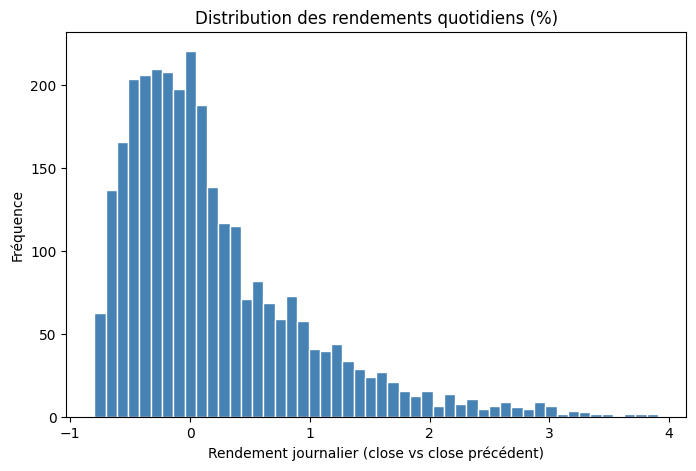

In [9]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,5))
df_features["ret_close_pct"].hist(bins=50, color="steelblue", edgecolor="white")
plt.title("Distribution des rendements quotidiens (%)")
plt.xlabel("Rendement journalier (close vs close précédent)")
plt.ylabel("Fréquence")
plt.grid(False)
plt.show()


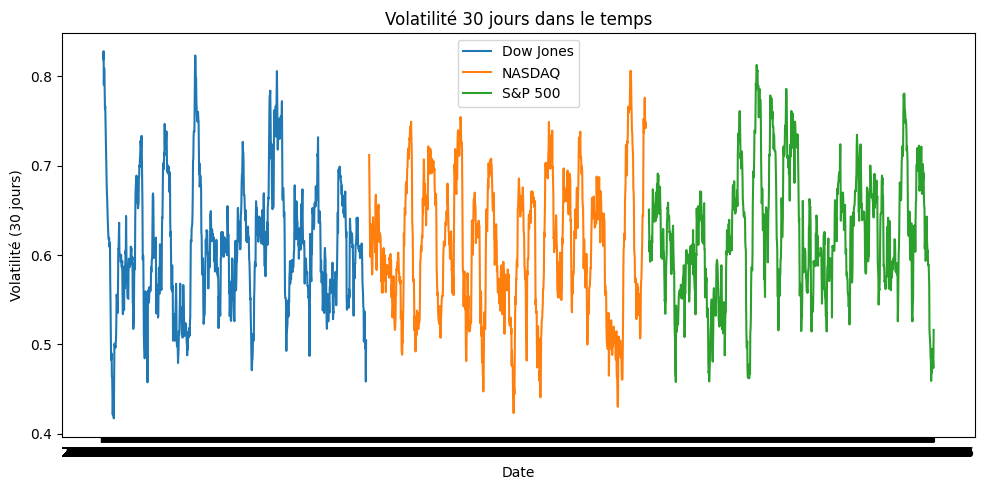

In [10]:
plt.figure(figsize=(10,5))
for idx in df_features["stock_index"].unique()[:3]:  # on limite à 3 indices pour la lisibilité
    subset = df_features[df_features["stock_index"] == idx]
    plt.plot(subset["date"], subset["vol_30d"], label=idx)

plt.title("Volatilité 30 jours dans le temps")
plt.xlabel("Date")
plt.ylabel("Volatilité (30 jours)")
plt.legend()
plt.tight_layout()
plt.show()


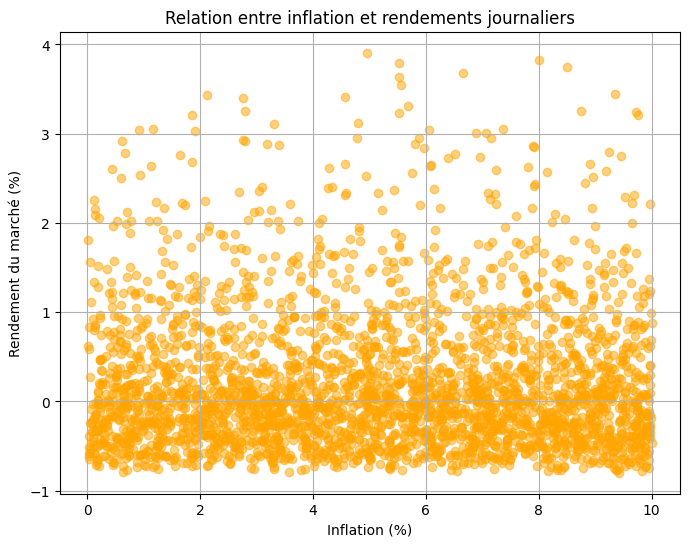

In [11]:
plt.figure(figsize=(8,6))
plt.scatter(df_features["inflation_rate_pct"], df_features["ret_close_pct"], alpha=0.5, color="orange")
plt.title("Relation entre inflation et rendements journaliers")
plt.xlabel("Inflation (%)")
plt.ylabel("Rendement du marché (%)")
plt.grid(True)
plt.show()


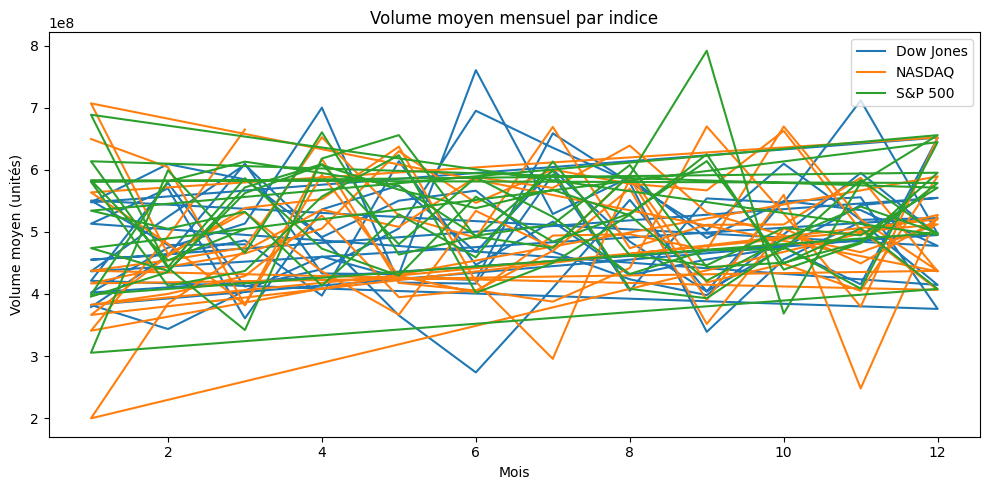

In [12]:
avg_volume = (
    df_features.groupby(["stock_index", "year", "month"])["trading_volume"]
    .mean()
    .reset_index()
)

plt.figure(figsize=(10,5))
for idx in df_features["stock_index"].unique()[:3]:
    subset = avg_volume[avg_volume["stock_index"] == idx]
    plt.plot(subset["month"], subset["trading_volume"], label=idx)

plt.title("Volume moyen mensuel par indice")
plt.xlabel("Mois")
plt.ylabel("Volume moyen (unités)")
plt.legend()
plt.tight_layout()
plt.show()


In [13]:
# Exporter le DataFrame (df_features) vers un fichier CSV
import pandas as pd

output_path = "finance_economics_dataset_enriched.csv"
df_features.to_csv(output_path, index=False, encoding="utf-8")

print(f"✅ Fichier exporté : {output_path}")


✅ Fichier exporté : finance_economics_dataset_enriched.csv


In [14]:
import pandas as pd
from sqlalchemy import create_engine, text
from sqlalchemy import types as satypes
from pathlib import Path

# Connexion PostgreSQL
username = "postgres"
password = "adamroot"
host = "localhost"
port = "5432"
database = "finance_economics"

engine = create_engine(f"postgresql+psycopg2://{username}:{password}@{host}:{port}/{database}")

# Charger le CSV 
csv_path = Path("finance_economics_dataset_enriched.csv")
df = pd.read_csv(csv_path, low_memory=False, parse_dates=["date"])

# Nom de table dans PostgreSQL
table_name = "market_daily_enriched"

# Types SQL 
dtype_map = {
    "date": satypes.Date(),
    "stock_index": satypes.String(length=120),
    "year": satypes.Integer(),
    "month": satypes.Integer(),
    "quarter": satypes.Integer(),
}

# ajout numeric pour les autres colonnes
for col in df.columns:
    if col not in dtype_map:
        dtype_map[col] = satypes.Numeric(38, 10)

# Envoi vers PostgreSQL
df.to_sql(
    name=table_name,
    con=engine,
    if_exists="replace",  # "append" si tu veux ajouter
    index=False,
    dtype=dtype_map,
    method="multi",
    chunksize=10000
)

# Index utiles
with engine.begin() as conn:
    conn.execute(text(f"CREATE INDEX IF NOT EXISTS idx_{table_name}_stock_date ON {table_name}(stock_index, date);"))
    conn.execute(text(f"CREATE INDEX IF NOT EXISTS idx_{table_name}_ym ON {table_name}(year, month);"))

print(f"✅ Table '{table_name}' importée avec succès dans la base '{database}'.")


✅ Table 'market_daily_enriched' importée avec succès dans la base 'finance_economics'.
